<a href="https://colab.research.google.com/github/ilman79/Case-Study-02-Data-Mining-UIN-Ganjil-2022-Kelompok-1/blob/main/Study_Case_2_Kelompok_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#IMPORT DATA

In [ ]:
import warnings; warnings.simplefilter('ignore')

try:
    import google.colab; IN_COLAB = True
    print("Installing the required modules")
    !pip install --upgrade umap-learn
    !wget https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/tau_unsup.py
except:
    IN_COLAB = False
    print("Running the code locally, please make sure all the python module versions agree with colab environment and all data/assets downloaded")

Installing the required modules
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
--2022-10-12 02:33:35--  https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/tau_unsup.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 17387 (17K) [text/plain]
Saving to: ‘tau_unsup.py.9’

tau_unsup.py.9      100%[===================>]  16.98K  --.-KB/s    in 0.001s  

2022-10-12 02:33:35 (30.8 MB/s) - ‘tau_unsup.py.9’ saved [17387/17387]



In [68]:
df = pd.read_csv('https://raw.githubusercontent.com/ilman79/Case-Study-02-Data-Mining-UIN-Ganjil-2022-Kelompok-1/main/Data/Case-Study-02-MixITup%20(1).csv')
df

,ID,Jenis Kelamin,Umur,Pendapatan-per-bulan,skor-pengeluaran,Menikah,Kota,Promo,HariFav,FavFlavor
0,101,Wanita,49,13114754,52,1,Jakarta,1.0,Sabtu,2
1,102,Wanita,32,33606557,86,1,Depok,1.0,Minggu,6
2,103,Pria,51,15983606,41,1,Jakarta,2.0,Minggu,3
3,104,Pria,19,12704918,55,0,Jakarta,1.0,Rabu,7
4,105,Wanita,38,20081967,42,1,Jakarta,2.0,Senin,8
...,...,...,...,...,...,...,...,...,...,...
195,296,Pria,31,4098360,73,1,Depok,1.0,Senin,0
196,297,Pria,57,15983606,51,1,Jakarta,1.0,Minggu,5
197,298,Wanita,35,43032786,79,1,Depok,1.0,Senin,7
198,299,Wanita,23,1229508,94,1,Depok,0.0,Selasa,0


In [69]:
import pandas as pd

sudah melakukan missing value di excel,

*   Sudah melakukan missing value di excel
*   variabel pendapatan-per-bulan,
variabel jenis kelamin,


In [62]:
# drop kolom yang tidak terpakai
df.drop(["ID"], axis=1, inplace=True)
df

,Jenis Kelamin,Umur,Pendapatan-per-bulan,skor-pengeluaran,Menikah,Kota,Promo,HariFav,FavFlavor
0,Wanita,49,13114754,52,1,Jakarta,1.0,Sabtu,2
1,Wanita,32,33606557,86,1,Depok,1.0,Minggu,6
2,Pria,51,15983606,41,1,Jakarta,2.0,Minggu,3
3,Pria,19,12704918,55,0,Jakarta,1.0,Rabu,7
4,Wanita,38,20081967,42,1,Jakarta,2.0,Senin,8
...,...,...,...,...,...,...,...,...,...
195,Pria,31,4098360,73,1,Depok,1.0,Senin,0
196,Pria,57,15983606,51,1,Jakarta,1.0,Minggu,5
197,Wanita,35,43032786,79,1,Depok,1.0,Senin,7
198,Wanita,23,1229508,94,1,Depok,0.0,Selasa,0


In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Jenis Kelamin         195 non-null    object 
 1   Umur                  200 non-null    int64  
 2   Pendapatan-per-bulan  200 non-null    int64  
 3   skor-pengeluaran      200 non-null    int64  
 4   Menikah               187 non-null    object 
 5   Kota                  200 non-null    object 
 6   Promo                 194 non-null    float64
 7   HariFav               200 non-null    object 
 8   FavFlavor             200 non-null    int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 14.2+ KB


In [97]:
df['Menikah'] = df['Menikah'] .astype('category')
df['Kota'] = df['Kota'] .astype('category')
df['Promo'] = df['Promo'] .astype('category')
df['HariFav'] = df['HariFav'] .astype('category')
df['FavFlavor'] = df['FavFlavor'] .astype('int64')
df['Jenis Kelamin'] = df['Jenis Kelamin'] .astype('category')
df['Promo'] = df['Promo'] .astype('category')

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   ID                    200 non-null    int64   
 1   Jenis Kelamin         195 non-null    category
 2   Umur                  200 non-null    int64   
 3   Pendapatan-per-bulan  200 non-null    int64   
 4   skor-pengeluaran      200 non-null    int64   
 5   Menikah               187 non-null    category
 6   Kota                  200 non-null    category
 7   Promo                 194 non-null    category
 8   HariFav               200 non-null    category
 9   FavFlavor             200 non-null    category
dtypes: category(6), int64(4)
memory usage: 8.9 KB


In [73]:
df.duplicated().sum()

0

In [74]:
df.isnull().sum()

ID                       0
Jenis Kelamin            5
Umur                     0
Pendapatan-per-bulan     0
skor-pengeluaran         0
Menikah                 13
Kota                     0
Promo                    6
HariFav                  0
FavFlavor                0
dtype: int64

In [75]:
# fungsi untuk menampilkan boxplot 
import seaborn as sns
import matplotlib.pyplot as plt
def boxplot_outlier(box):
  fig, ax = plt.subplots(figsize = (8,7))
  sns.boxplot(x = box)

In [76]:
# fungsi untuk menampilkan boxplot 

def boxplot_outlier(box):
  fig, ax = plt.subplots(figsize = (8,7))
  sns.boxplot(x = box)

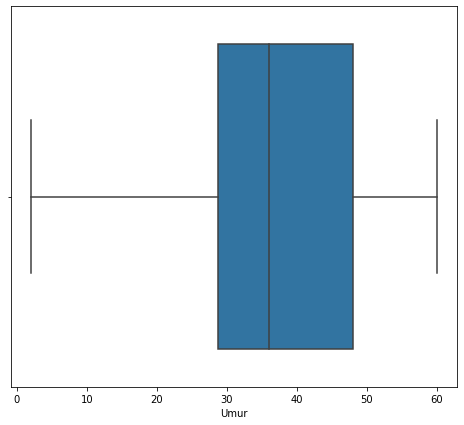

In [83]:
# fungsi untuk menampilkan batas atas dan batas bawah

def batas(batas):
  Q1 = batas.quatile(0.25) 
  Q3 = batas.quatile(0.75)

  IQR = Q3 - Q1

  global batasBawah
  batasBawah = Q1 - (1.5 * IQR) 

  global batasAtas
  batasBawah = Q3 + (1.5 * IQR)

  print("Batas Bawah = ", batasBawah, "\nBatas Atas = ", batasAtas)
def show_outlier(file, column):
  return file[(column < batasBawah) | (column > batasAtas)]

boxplot_outlier(df.Umur)

#VISUALISASI DATA

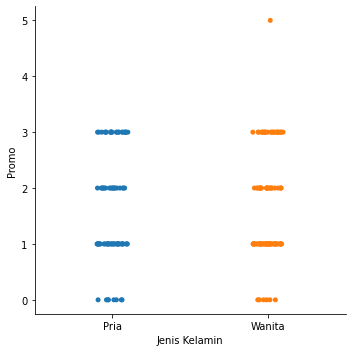

In [85]:
p= sns.catplot(x="Jenis Kelamin", y="Promo", data=df)
# Apa yang bisa dilihat dari hasil ini?

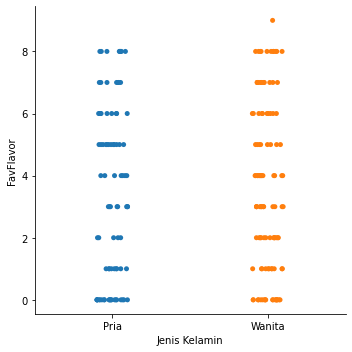

In [86]:
p= sns.catplot(x="Jenis Kelamin", y="FavFlavor", data=df)

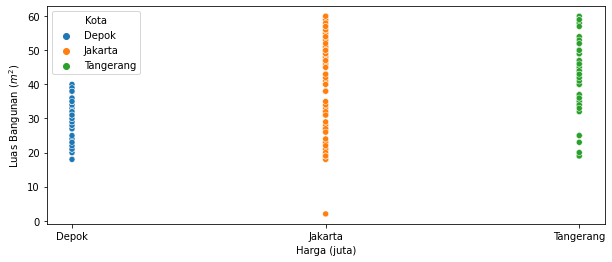

In [88]:
plt.figure(figsize = (10, 4))
plt.xlabel('Harga (juta)')
plt.ylabel('Luas Bangunan ($m^2$)')
p = sns.scatterplot(x="Kota", y="Umur", hue='Kota', data=df)

**Dari visualisasi di atas dapat dilihat bahwa pengunjung MixITup yang paling sering beli adalah wanita dengan umur 32 tahun. Hal tersebut diduga karena tempat yang nyaman memungkinkan wanita tersebut menyelesaikan perkerjaannya di MixItup.**


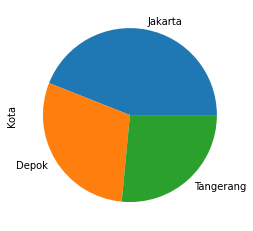

In [89]:
df.Kota.value_counts().plot(kind='pie')

In [103]:
# Scatter Plot of the hierarchical clustering results
X2D = umap.UMAP(n_neighbors=5, min_dist=0.3, random_state=random_state).fit_transform(X)
fig, ax = plt.subplots()
ax.scatter(X2D[:,0], X2D[:,1], c=C_h)
plt.show()

ValueError: ignored

In [101]:
df.corr()

,ID,Umur,Pendapatan-per-bulan,skor-pengeluaran,FavFlavor
ID,1.000000,-0.024532,0.035482,0.037461,0.032833
Umur,-0.024532,1.000000,0.034767,-0.335117,0.057894
Pendapatan-per-bulan,0.035482,0.034767,1.000000,0.009587,0.015150
skor-pengeluaran,0.037461,-0.335117,0.009587,1.000000,-0.185610
FavFlavor,0.032833,0.057894,0.015150,-0.185610,1.000000


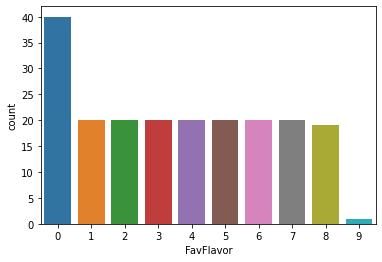

In [105]:
a = sns.countplot(x="FavFlavor", data=df)

In [112]:
df["skor-pengeluaran"] = (df["skor-pengeluaran"] - df["skor-pengeluaran"].mean()) / df["skor-pengeluaran"].std()
df["Umur"] = (df["Umur"] - df["Umur"].mean()) / df["Umur"].std()
df["FavFlavor"] = (df["FavFlavor"] - df["FavFlavor"].mean()) / df["FavFlavor"].std()